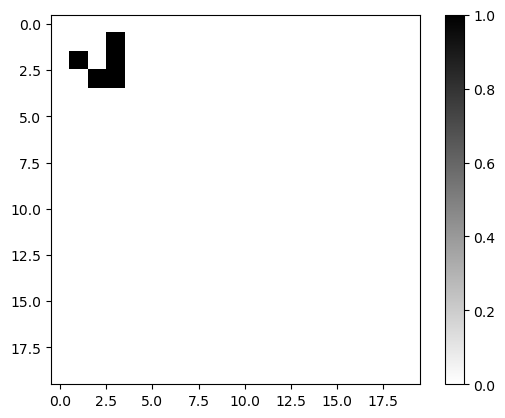

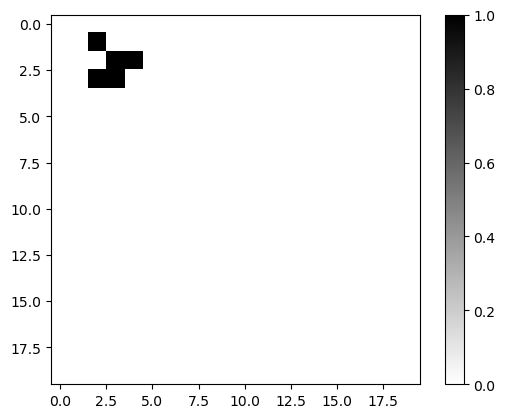

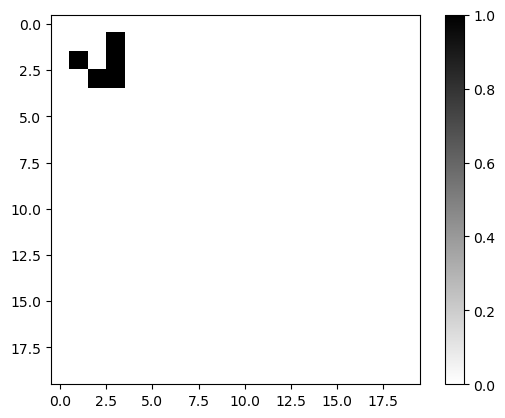

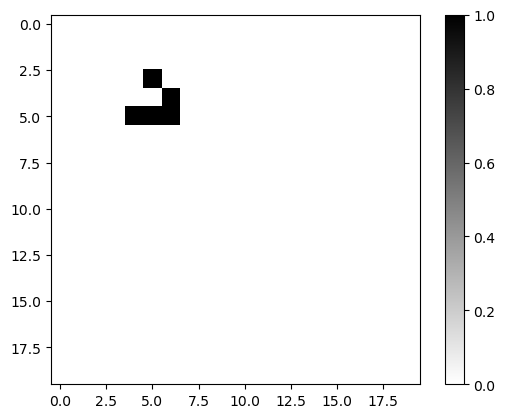

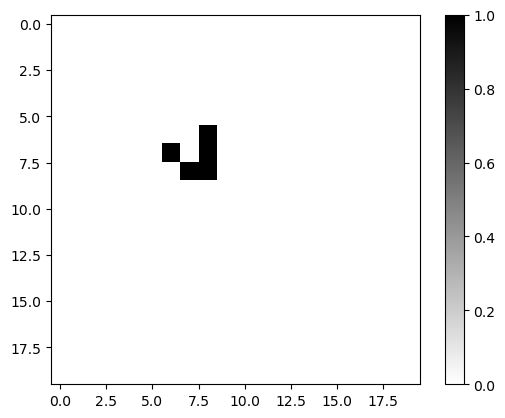

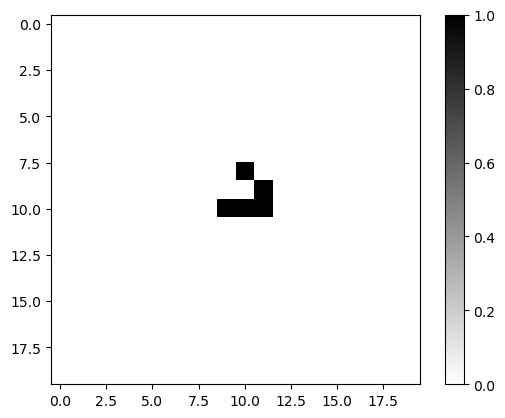

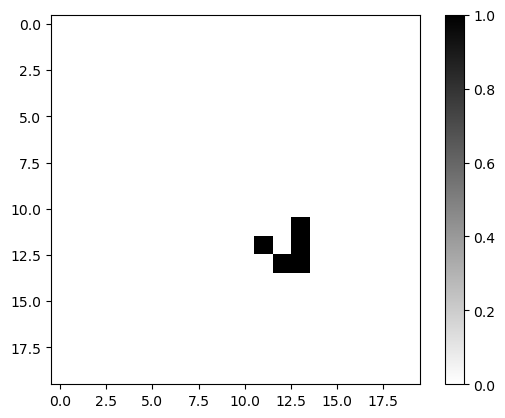

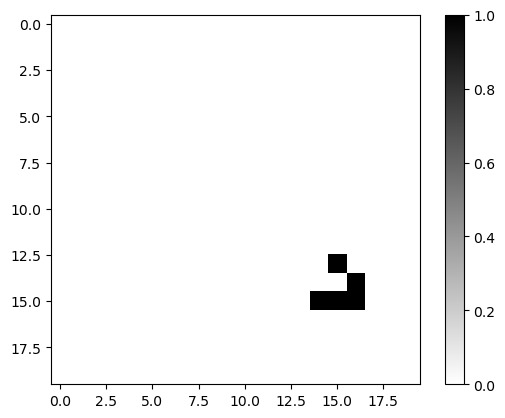

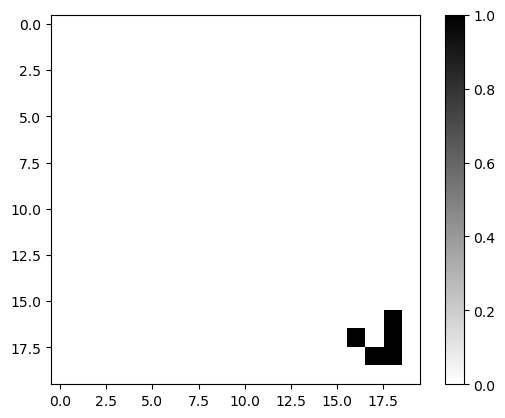

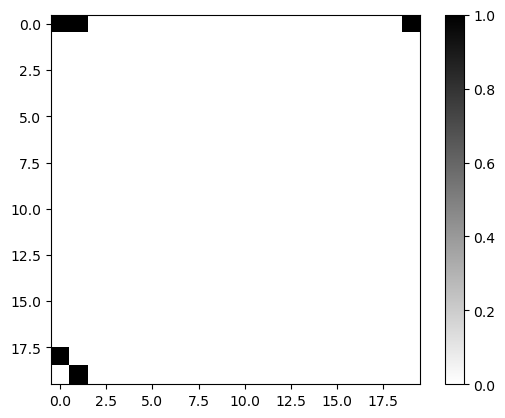

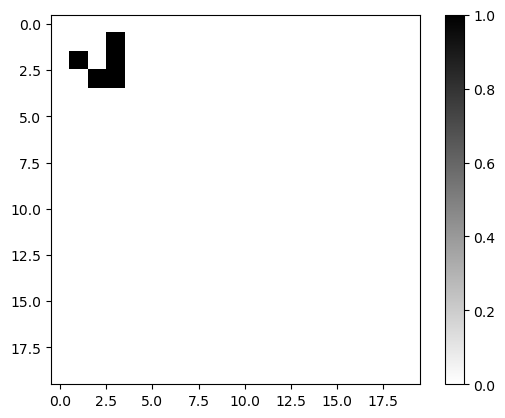

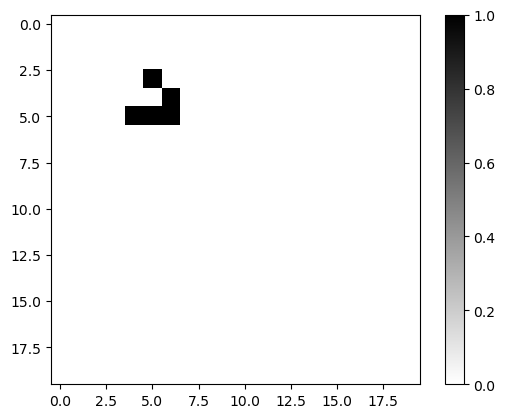

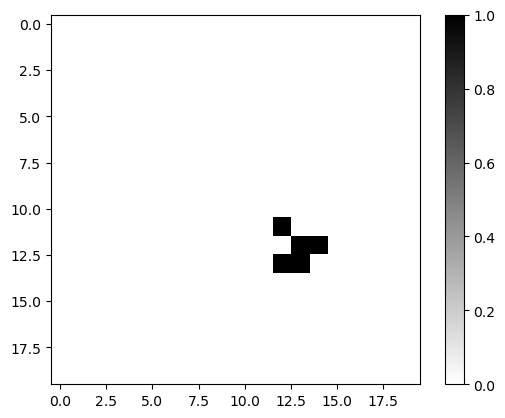

In [1]:
#Matt Goldfarb 113346370

#In this function, the game of life is played, and it has a function "evolve" which will find the length of all the neighbors (including the modulus of the indicies) and make an updated grid after an iteration, this is done multiple times and saved into a video using the video functions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sys #sys function for anaconda to put in values

if len(sys.argv) > 1:
    k = int(sys.argv[1])
else:
    k = 100

grid = np.zeros((20, 20))
glider=[[False, False, True],[True, False, True],[False, True, True]]
grid[1:4, 1:4] = np.array(glider)

plt.imshow(grid, cmap='binary', interpolation='none')
plt.colorbar()
plt.show()

def evolve(grid):
    new_grid = np.zeros((20,20))
    for i in range(20):
        for j in range(20):
            if grid[i % 20, j % 20] == False:
                if (grid[(i + 1) % 20, j % 20] + grid[(i - 1) % 20, j % 20] + grid[(i + 1) % 20, (j + 1) % 20] + grid[(i + 1) % 20, (j - 1) % 20] + grid[(i - 1) % 20, (j + 1) % 20] + grid[(i - 1) % 20, (j - 1) % 20] + grid[i % 20, (j + 1) % 20] + grid[i % 20, (j - 1) % 20]) == 3:
                    new_grid[i % 20, j % 20] = True
            if grid[i % 20, j % 20] == True:
                if (grid[(i + 1) % 20, j % 20] + grid[(i - 1) % 20, j % 20] + grid[(i + 1) % 20, (j + 1) % 20] + grid[(i + 1) % 20, (j - 1) % 20] + grid[(i - 1) % 20, (j + 1) % 20] + grid[(i - 1) % 20, (j - 1) % 20] + grid[i % 20, (j + 1) % 20] + grid[i % 20, (j - 1) % 20]) > 3:
                    new_grid[i % 20, j % 20] = False
                if 2 <= (grid[(i + 1) % 20, j % 20] + grid[(i - 1) % 20, j % 20] + grid[(i + 1) % 20, (j + 1) % 20] + grid[(i + 1) % 20, (j - 1) % 20] + grid[(i - 1) % 20, (j + 1) % 20] + grid[(i - 1) % 20, (j - 1) % 20] + grid[i % 20, (j + 1) % 20] + grid[i % 20, (j - 1) % 20]) <= 3:
                    new_grid[i % 20, j % 20] = True
                if (grid[(i + 1) % 20, j % 20] + grid[(i - 1) % 20, j % 20] + grid[(i + 1) % 20, (j + 1) % 20] + grid[(i + 1) % 20, (j - 1) % 20] + grid[(i - 1) % 20, (j + 1) % 20] + grid[(i - 1) % 20, (j - 1) % 20] + grid[i % 20, (j + 1) % 20] + grid[i % 20, (j - 1) % 20]) < 2:
                    new_grid[i % 20, j % 20] = False
    return new_grid

plt.imshow(evolve(grid), cmap='binary', interpolation='none')
plt.colorbar()
plt.show()

def visualize(grid):
    plt.imshow(grid, cmap='binary', interpolation='none')
    plt.colorbar()
    plt.show()

for step in range(k):
    if step % 10 == 0:
        visualize(grid)
    grid = evolve(grid)

fig, ax = plt.subplots()
def animate(frame):
    ax.clear()
    ax.imshow(grid, cmap='binary', interpolation='none')
    grid[:] = evolve(grid)
ani = animation.FuncAnimation(fig, animate, frames=100, interval=100)
ani.save('game_of_life.gif', writer='pillow', fps=10)
plt.imsave('game_of_life.png', grid, cmap='binary')
plt.imshow(grid, cmap='binary', interpolation='none')
plt.colorbar()
plt.show()